# Nigam Pranay Mehta
# Task 5: Exploratory Data Analysis (EDA)

**Objective:** Extract insights using visual and statistical exploration.
**Dataset:** Titanic Dataset
**Tools:** Python (Pandas, Matplotlib, Seaborn)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure styles
sns.set_style('whitegrid')
%matplotlib inline

# Load dataset
df = pd.read_csv('titanic.csv')
print("Dataset/Loaded successfully.")

Dataset/Loaded successfully.


## 1. Data Overview
Using `.head()`, `.info()`, `.describe()`, and `.value_counts()` to understand the data structure.

In [6]:
# Display first few rows
display(df.head())

# Info (Data types and missing values)
print("\n--- Info ---")
df.info()

# Statistical Summary
print("\n--- Statistical Summary ---")
display(df.describe())

# Value Counts for categorical columns
print("\n--- Value Counts ---")
print("Survived:\n", df['Survived'].value_counts())
print("Pclass:\n", df['Pclass'].value_counts())
print("Sex:\n", df['Sex'].value_counts())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--- Statistical Summary ---


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



--- Value Counts ---
Survived:
 Survived
0    549
1    342
Name: count, dtype: int64
Pclass:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex:
 Sex
male      577
female    314
Name: count, dtype: int64


## 2. Visualizations and Observations

### Correlation Heatmap

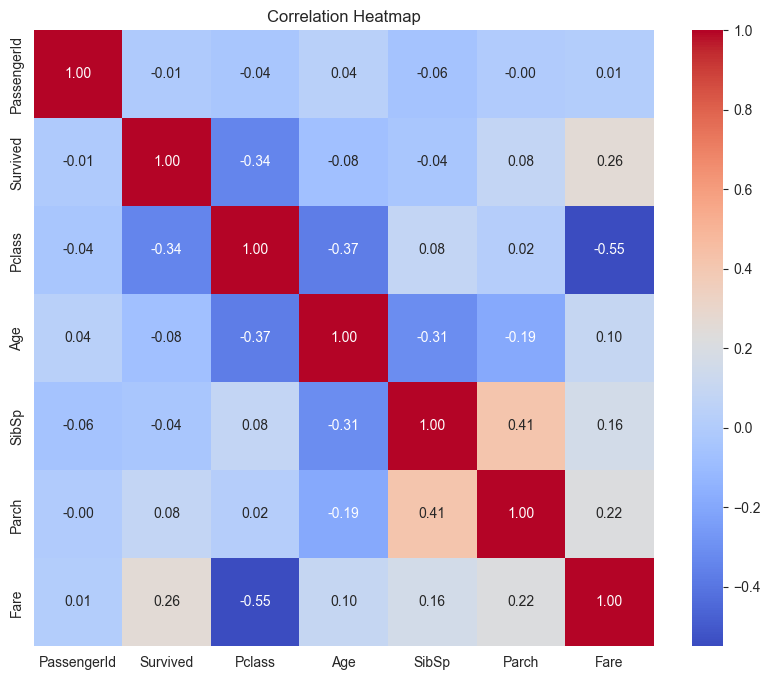

In [7]:
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Observation:**  
- Look for squares with high positive or negative numbers (close to 1 or -1).  
- 'Pclass' has a negative correlation with 'Fare' (as expected, lower class number = higher fare).  
- 'Survived' often correlates with 'Fare' (positive) and 'Pclass' (negative).

### Pairplot

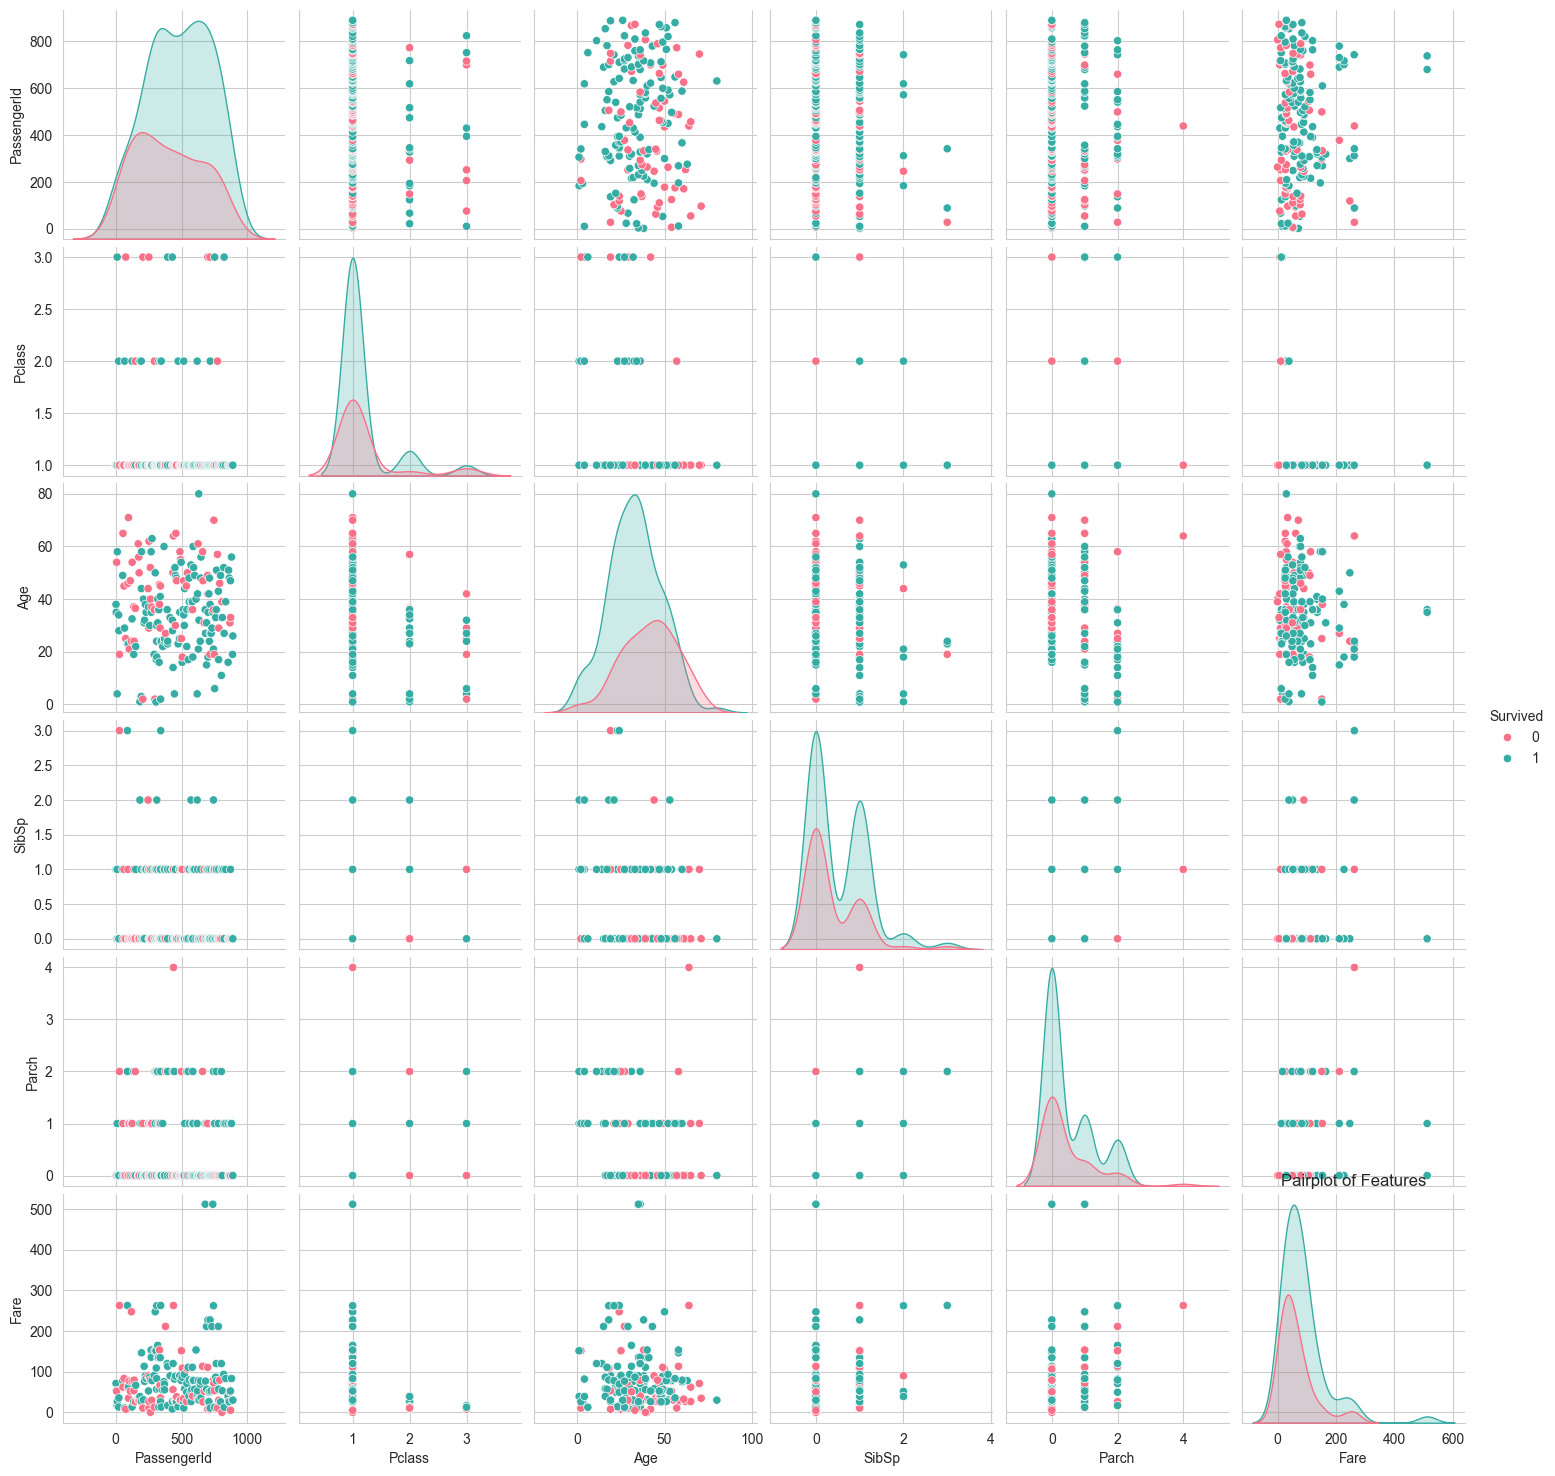

In [8]:
# Using 'Survived' as hue to see separation
sns.pairplot(df.dropna(), hue='Survived', palette='husl')
plt.title('Pairplot of Features')
plt.show()

**Observation:**  
- The pairplot shows scatterplots for all pairs of numeric variables.  
- We can see how different classes (Survived=0 vs 1) distribute across Age, Fare, etc.

### Histograms (Univariate Analysis)

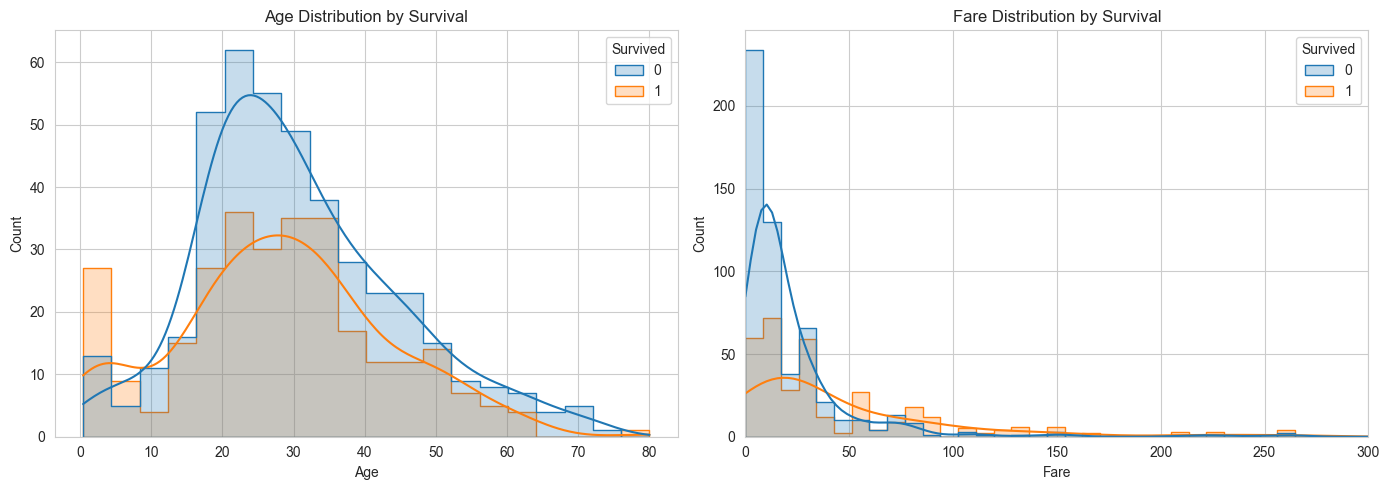

In [9]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', kde=True, hue='Survived', element='step')
plt.title('Age Distribution by Survival')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Fare', kde=True, hue='Survived', element='step')
plt.title('Fare Distribution by Survival')
plt.xlim(0, 300) # Limiting x-axis for Fare to see better

plt.tight_layout()
plt.show()

**Observation:**  
- **Age:** Children (low age) show a higher survival rate relative to non-survival compared to young adults.  
- **Fare:** A large number of passengers who paid low fares did not survive. Higher fares seem associated with better survival chances.

### Boxplots (Bivariate Analysis)

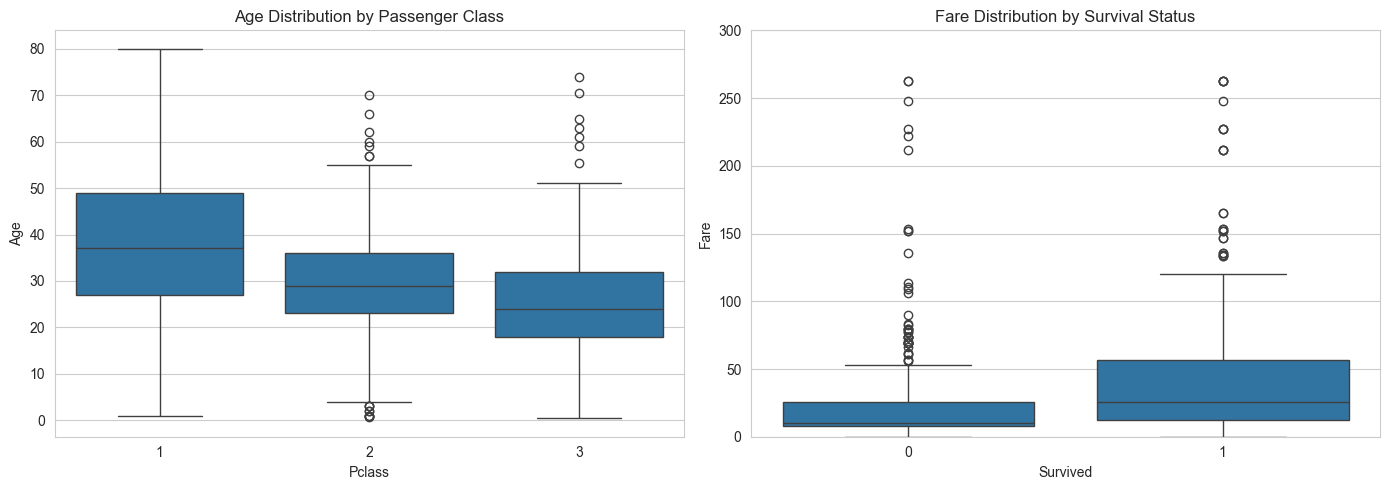

In [10]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Passenger Class')

plt.subplot(1, 2, 2)
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival Status')
plt.ylim(0, 300)

plt.tight_layout()
plt.show()

**Observation:**  
- **Age by Class:** 1st class passengers are generally older than 2nd and 3rd class passengers.  
- **Fare by Survival:** Survivors tended to pay higher fares on average (higher median).

### Scatterplot

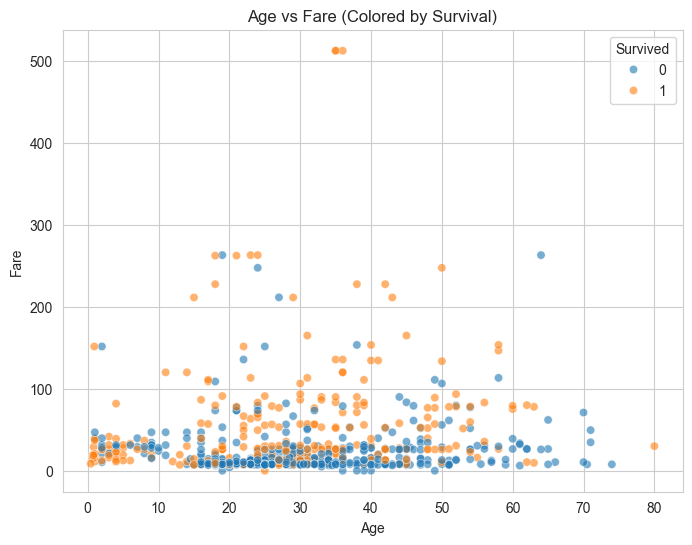

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, alpha=0.6)
plt.title('Age vs Fare (Colored by Survival)')
plt.show()

**Observation:**  
- There is no strict linear relationship between Age and Fare.  
- However, we can see clusters. High fare passengers (top of plot) are mostly survivors (orange/blue dependent on palette).